# **¬øCoinciden la cr√≠tica y la audiencia sobre qui√©nes son los grandes artistas musicales?**

---



## *Un an√°lisis en la era del streaming a partir de los rankings hist√≥ricos de Rolling Stone y la popularidad en Spotify.*


Este notebook forma parte del **proyecto final del Bootcamp de An√°lisis de Datos de C√≥digo Facilito**. A lo largo del documento se realizar√° el proceso de **preparaci√≥n de datos** y posteriormente el **an√°lisis exploratorio de datos (EDA)**, utilizando un √∫nico dataset que incluye tanto los rankings hist√≥ricos de Rolling Stone como informaci√≥n del √çndice de Popularidad de Spotify. Todos los datos provienen de una misma fuente original. El objetivo es dejar un dataset **limpio**, **estructurado** y listo para responder la pregunta de investigaci√≥n planteada sobre el grado de coincidencia entre la cr√≠tica especializada y la audiencia popular en la definici√≥n de artistas reconocidos.

El procesamiento de datos seguir√° los lineamientos del enfoque tradicional en Ciencia de Datos **ETL (Extract, Transform, Load)**.

## 0. Instalaci√≥n de librer√≠as de Python



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ‚úÖ **PREPARACI√ìN DE DATOS**: **ETL** (**E**xtract, **T**ransform, **L**oad)

# ‚úç **EXTRACT**

Esta fase corresponde a la **extracci√≥n y lectura de los datos** provenientes de las fuentes originales. En ella, se realiza una **exploraci√≥n inicial del dataset** para verificar su correcta importaci√≥n y comprender su estructura. El objetivo es asegurar que toda la informaci√≥n est√© disponible y correctamente cargada antes de continuar con las transformaciones.

## 1. Carga y exploraci√≥n de datos
Se realiza la **carga del archivo CSV** en Google Colab y se **lee el dataset** para su posterior an√°lisis.

In [ ]:
df = pd.read_csv("/content/sample_data/rolling_stone_original.csv")

In [ ]:
df

sort_name         clean_name                           album  \
0    Sinatra, Frank      Frank Sinatra          In the Wee Small Hours   
1       Diddley, Bo         Bo Diddley      Bo Diddley / Go Bo Diddley   
2    Presley, Elvis      Elvis Presley                   Elvis Presley   
3    Sinatra, Frank      Frank Sinatra      Songs for Swingin' Lovers!   
4    Little Richard     Little Richard           Here's Little Richard   
..              ...                ...                             ...   
686            Beck               Beck                      Sea Change   
687      Cooke, Sam          Sam Cooke  Portrait of a Legend 1951-1964   
688   White Stripes  The White Stripes                        Elephant   
689      Chao, Manu          Manu Chao     Proxima estacion: Esperanza   
690      Beach Boys     The Beach Boys              The Smile Sessions   

     rank_2003  rank_2012  rank_2020  differential  release_year  \
0        100.0      101.0      282.0          -182          1955   
1        214.0      216.0      455.0          -241          1955   
2         55.0       56.0      332.0          -277          1956   
3        306.0      308.0        NaN          -195          1956   
4         50.0       50.0      227.0          -177          1957   
..         ...        ...        ...           ...           ...   
686      440.0      436.0        NaN           -61          2002   
687      106.0      107.0      307.0          -201          2003   
688      390.0      390.0      449.0           -59          2003   
689        NaN      474.0        NaN          -501          2001   
690        NaN      381.0        NaN          -501          2011   

                           genre           type  ...  peak_billboard_position  \
0                  Big Band/Jazz         Studio  ...                        2   
1    Rock n' Roll/Rhythm & Blues         Studio  ...                      201   
2    Rock n' Roll/Rhythm & Blues         Studio  ...                        1   
3                  Big Band/Jazz         Studio  ...                        2   
4                            NaN         Studio  ...                       13   
..                           ...            ...  ...                      ...   
686       Indie/Alternative Rock         Studio  ...                        8   
687              Soul/Gospel/R&B  Greatest Hits  ...                      135   
688             Blues/Blues Rock         Studio  ...                        6   
689                        Latin         Studio  ...                      201   
690                          NaN    Compilation  ...                      201   

     spotify_popularity                           spotify_url  \
0                  48.0  spotify:album:3GmwKB1tgPZgXeRJZSm9WX   
1                  50.0  spotify:album:1cbtDEwxCjMhglb49OgNBR   
2                  58.0  spotify:album:7GXP5OhYyPVLmcVfO9Iqin   
3                  62.0  spotify:album:4kca7vXd1Wo5GE2DMafvMc   
4                  64.0  spotify:album:18tV6PLXYvVjsdOVk0S7M8   
..                  ...                                   ...   
686                51.0  spotify:album:5ieP11rJQvuYz0Ov3k03cy   
687                55.0  spotify:album:4jiO2jRz7g50ESvYYKsKwZ   
688                76.0  spotify:album:6D9urpsOWWKtYvF6PaorGE   
689                73.0  spotify:album:4t1LLdXiWTfoywqricztFo   
690                41.0  spotify:album:01TG7VOg4F90jXv3a1yCgA   

    artist_member_count  artist_gender artist_birth_year_sum  \
0                   1.0           Male                1915.0   
1                   1.0           Male                1928.0   
2                   1.0           Male                1935.0   
3                   1.0           Male                1915.0   
4                   1.0           Male                1932.0   
..                  ...            ...                   ...   
686                 1.0           Male                1970.0   
687                 1.0           Male

## 2. Revisi√≥n de la presentaci√≥n de columnas
Se configura la **visualizaci√≥n completa de las columnas** del DataFrame.

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [ ]:
df

sort_name         clean_name                           album  \
0    Sinatra, Frank      Frank Sinatra          In the Wee Small Hours   
1       Diddley, Bo         Bo Diddley      Bo Diddley / Go Bo Diddley   
2    Presley, Elvis      Elvis Presley                   Elvis Presley   
3    Sinatra, Frank      Frank Sinatra      Songs for Swingin' Lovers!   
4    Little Richard     Little Richard           Here's Little Richard   
..              ...                ...                             ...   
686            Beck               Beck                      Sea Change   
687      Cooke, Sam          Sam Cooke  Portrait of a Legend 1951-1964   
688   White Stripes  The White Stripes                        Elephant   
689      Chao, Manu          Manu Chao     Proxima estacion: Esperanza   
690      Beach Boys     The Beach Boys              The Smile Sessions   

     rank_2003  rank_2012  rank_2020  differential  release_year  \
0        100.0      101.0      282.0          -182          1955   
1        214.0      216.0      455.0          -241          1955   
2         55.0       56.0      332.0          -277          1956   
3        306.0      308.0        NaN          -195          1956   
4         50.0       50.0      227.0          -177          1957   
..         ...        ...        ...           ...           ...   
686      440.0      436.0        NaN           -61          2002   
687      106.0      107.0      307.0          -201          2003   
688      390.0      390.0      449.0           -59          2003   
689        NaN      474.0        NaN          -501          2001   
690        NaN      381.0        NaN          -501          2011   

                           genre           type  weeks_on_billboard  \
0                  Big Band/Jazz         Studio                14.0   
1    Rock n' Roll/Rhythm & Blues         Studio                 NaN   
2    Rock n' Roll/Rhythm & Blues         Studio               100.0   
3                  Big Band/Jazz         Studio                 NaN   
4                            NaN         Studio                 5.0   
..                           ...            ...                 ...   
686       Indie/Alternative Rock         Studio                26.0   
687              Soul/Gospel/R&B  Greatest Hits                 1.0   
688             Blues/Blues Rock         Studio                57.0   
689                        Latin         Studio                 NaN   
690                          NaN    Compilation                 NaN   

     peak_billboard_position  spotify_popularity  \
0                          2                48.0   
1                        201                50.0   
2                          1                58.0   
3                          2                62.0   
4                         13                64.0   
..                       ...                 ...   
686                        8                51.0   
687                      135                55.0   
688                        6                76.0   
689                      201                73.0   
690                      201                41.0   

                              spotify_url  artist_member_count artist_gender  \
0    spotify:album:3GmwKB1tgPZgXeRJZSm9WX                  1.0          Male   
1    spotify:album:1cbtDEwxCjMhglb49OgNBR                  1.0          Male   
2    spotify:album:7GXP5OhYyPVLmcVfO9Iqin                  1.0          Male   
3    spotify:album:4kca7vXd1Wo5GE2DMafvMc                  1.0          Male   
4    spotify:album:18tV6PLXYvVjsdOVk0S7M8                  1.0          Male   
..                                    ...                  ...           ...   
686  spotify:album:5ieP11rJQvuYz0Ov3k03cy                  1.0          Male   
687  spotify:album:4jiO2jRz7g50ESvYYKsKwZ                  1.0          Male   
688  spotify:album:6D9urpsOWWKtYvF6PaorGE                  2.0   Male/Female   
689  spotify:album:4t1LLdX

## 3. Verificaci√≥n inicial de la estructura del DataFrame

Se observan las **primeras 5 filas** del DataFrame.

In [ ]:
df.head(5)

sort_name      clean_name                       album  rank_2003  \
0  Sinatra, Frank   Frank Sinatra      In the Wee Small Hours      100.0   
1     Diddley, Bo      Bo Diddley  Bo Diddley / Go Bo Diddley      214.0   
2  Presley, Elvis   Elvis Presley               Elvis Presley       55.0   
3  Sinatra, Frank   Frank Sinatra  Songs for Swingin' Lovers!      306.0   
4  Little Richard  Little Richard       Here's Little Richard       50.0   

   rank_2012  rank_2020  differential  release_year  \
0      101.0      282.0          -182          1955   
1      216.0      455.0          -241          1955   
2       56.0      332.0          -277          1956   
3      308.0        NaN          -195          1956   
4       50.0      227.0          -177          1957   

                         genre    type  weeks_on_billboard  \
0                Big Band/Jazz  Studio                14.0   
1  Rock n' Roll/Rhythm & Blues  Studio                 NaN   
2  Rock n' Roll/Rhythm & Blues  Studio               100.0   
3                Big Band/Jazz  Studio                 NaN   
4                          NaN  Studio                 5.0   

   peak_billboard_position  spotify_popularity  \
0                        2                48.0   
1                      201                50.0   
2                        1                58.0   
3                        2                62.0   
4                       13                64.0   

                            spotify_url  artist_member_count artist_gender  \
0  spotify:album:3GmwKB1tgPZgXeRJZSm9WX                  1.0          Male   
1  spotify:album:1cbtDEwxCjMhglb49OgNBR                  1.0          Male   
2  spotify:album:7GXP5OhYyPVLmcVfO9Iqin                  1.0          Male   
3  spotify:album:4kca7vXd1Wo5GE2DMafvMc                  1.0          Male   
4  spotify:album:18tV6PLXYvVjsdOVk0S7M8                  1.0          Male   

   artist_birth_year_sum  debut_album_release_year  ave_age_at_top_500  \
0                 1915.0                    1946.0                40.0   
1                 1928.0                    1955.0                27.0   
2                 1935.0                    1956.0                21.0   
3                 1915.0                    1946.0                41.0   
4                 1932.0                    1957.0                25.0   

   years_between                album_id  
0            9.0  3GmwKB1tgPZgXeRJZSm9WX  
1            0.0  1cbtDEwxCjMhglb49OgNBR  
2            0.0  7GXP5OhYyPVLmcVfO9Iqin  
3           10.0  4kca7vXd1Wo5GE2DMafvMc  
4            0.0  18tV6PLXYvVjsdOVk0S7M8

Se observan las **√∫ltimas 5 filas** del DataFrame.

In [ ]:
df.tail(5)

sort_name         clean_name                           album  \
686           Beck               Beck                      Sea Change   
687     Cooke, Sam          Sam Cooke  Portrait of a Legend 1951-1964   
688  White Stripes  The White Stripes                        Elephant   
689     Chao, Manu          Manu Chao     Proxima estacion: Esperanza   
690     Beach Boys     The Beach Boys              The Smile Sessions   

     rank_2003  rank_2012  rank_2020  differential  release_year  \
686      440.0      436.0        NaN           -61          2002   
687      106.0      107.0      307.0          -201          2003   
688      390.0      390.0      449.0           -59          2003   
689        NaN      474.0        NaN          -501          2001   
690        NaN      381.0        NaN          -501          2011   

                      genre           type  weeks_on_billboard  \
686  Indie/Alternative Rock         Studio                26.0   
687         Soul/Gospel/R&B  Greatest Hits                 1.0   
688        Blues/Blues Rock         Studio                57.0   
689                   Latin         Studio                 NaN   
690                     NaN    Compilation                 NaN   

     peak_billboard_position  spotify_popularity  \
686                        8                51.0   
687                      135                55.0   
688                        6                76.0   
689                      201                73.0   
690                      201                41.0   

                              spotify_url  artist_member_count artist_gender  \
686  spotify:album:5ieP11rJQvuYz0Ov3k03cy                  1.0          Male   
687  spotify:album:4jiO2jRz7g50ESvYYKsKwZ                  1.0          Male   
688  spotify:album:6D9urpsOWWKtYvF6PaorGE                  2.0   Male/Female   
689  spotify:album:4t1LLdXiWTfoywqricztFo                  1.0          Male   
690  spotify:album:01TG7VOg4F90jXv3a1yCgA                  6.0          Male   

     artist_birth_year_sum  debut_album_release_year  ave_age_at_top_500  \
686                 1970.0                    1993.0           32.000000   
687                 1931.0                    1958.0           72.000000   
688                 3949.0                    1999.0           28.500000   
689                 1961.0                    1998.0           40.000000   
690                11657.0                    1962.0           68.166667   

     years_between                album_id  
686            9.0  5ieP11rJQvuYz0Ov3k03cy  
687           45.0  4jiO2jRz7g50ESvYYKsKwZ  
688            4.0  6D9urpsOWWKtYvF6PaorGE  
689            3.0  4t1LLdXiWTfoywqricztFo  
690           49.0  01TG7VOg4F90jXv3a1yCgA

Se registra el **n√∫mero total de filas y columnas** del DataFrame.
Las **691 filas** corresponden a los artistas presentes en una o varias de las tres ediciones del ranking de Rolling Stone.
Las **21 columnas** representan las variables incluidas por los creadores del dataset original para analizar qu√© hace a un √°lbum el mejor de todos los tiempos (The Pudding, "What Makes an Album The Greatest of All Times?" vissual essay).

In [ ]:
df.shape

(691, 21)

## 4. Comprobaci√≥n de los tipos de datos

Se registran ciertas **inconsistencias** que requerir√°n transformaci√≥n en etapas posteriores:
1. Las columnas vinculadas a las **3 ediciones de ranking de Rolling Stone** (2003, 2012 y 2020), junto con las columnas '**Spotify Popularity**' e '**Years Between Debut and Top 500 Album**' contienen valores '**float**' cuando deber√≠an ser '**int**'.
2. Algunas columnas que presentan inconsistencias en sus tipos de datos no ser√°n transformadas, ya que **no forman parte de las variables, indicadores ni KPI's** seleccionados para el an√°lisis. Se considerar√° su posible eliminaci√≥n en la etapa de transformaci√≥n.

In [ ]:
df.dtypes

sort_name                    object
clean_name                   object
album                        object
rank_2003                   float64
rank_2012                   float64
rank_2020                   float64
differential                  int64
release_year                  int64
genre                        object
type                         object
weeks_on_billboard          float64
peak_billboard_position       int64
spotify_popularity          float64
spotify_url                  object
artist_member_count         float64
artist_gender                object
artist_birth_year_sum       float64
debut_album_release_year    float64
ave_age_at_top_500          float64
years_between               float64
album_id                     object
dtype: object

## 5. Detecci√≥n de valores nulos por columna



Este paso permite identificar las variables que requerir√°n **tratamiento posterior en la fase de transformaci√≥n**.
Se observa una **gran cantidad de valores nulos** en las **tres columnas correspondientes a los rankings hist√≥ricos** (191 en cada una) y en la columna de **g√©nero musical del √°lbum** (164), lo cual ser√° considerado en la etapa de transformaci√≥n.
La columna 'weeks_on_billboard' tambi√©n presenta una cantidad significativa de datos faltantes (119), pero no ser√° utilizada en este an√°lisis.

In [ ]:
df.isnull().sum()

sort_name                     0
clean_name                    0
album                         0
rank_2003                   191
rank_2012                   191
rank_2020                   191
differential                  0
release_year                  0
genre                       164
type                          0
weeks_on_billboard          119
peak_billboard_position       0
spotify_popularity           37
spotify_url                  36
artist_member_count           5
artist_gender                 5
artist_birth_year_sum         5
debut_album_release_year      5
ave_age_at_top_500            5
years_between                 5
album_id                      0
dtype: int64

## 6. Estad√≠sticas descriptivas de las variables num√©ricas

Se obtiene un **resumen estad√≠stico inicial** de las variables num√©ricas del dataset.
Esta revisi√≥n preliminar permite observar la distribuci√≥n, dispersi√≥n y posibles outliers, lo cual ser√° √∫til para **guiar decisiones** en la etapa de transformaci√≥n y en el **an√°lisis exploratorio** posterior.

In [ ]:
df.describe()

rank_2003   rank_2012   rank_2020  differential  release_year  \
count  500.000000  500.000000  500.000000    691.000000    691.000000   
mean   250.504000  250.500000  250.500000    -12.322721   1982.872648   
std    144.486063  144.481833  144.481833    199.041031     14.554784   
min      1.000000    1.000000    1.000000   -501.000000   1955.000000   
25%    125.750000  125.750000  125.750000   -137.500000   1971.000000   
50%    250.500000  250.500000  250.500000     -8.000000   1979.000000   
75%    375.250000  375.250000  375.250000    106.000000   1994.000000   
max    500.000000  500.000000  500.000000    484.000000   2019.000000   

       weeks_on_billboard  peak_billboard_position  spotify_popularity  \
count          572.000000               691.000000          654.000000   
mean            64.270979                61.193922           55.805810   
std             75.141513                77.156551           14.948525   
min              1.000000                 1.000000           10.000000   
25%             20.750000                 2.000000           46.000000   
50%             44.500000                17.000000           57.000000   
75%             81.000000               111.500000           68.000000   
max            741.000000               201.000000           91.000000   

       artist_member_count  artist_birth_year_sum  debut_album_release_year  \
count           686.000000             686.000000                686.000000   
mean              2.746356            5363.214286               1976.871720   
std               2.023174            3947.127116                 14.958566   
min               1.000000            1910.000000               1934.000000   
25%               1.000000            1948.000000               1966.250000   
50%               2.000000            3896.000000               1973.000000   
75%               4.000000            7845.000000               1989.000000   
max              12.000000           23368.000000               2019.000000   

       ave_age_at_top_500  years_between  
count          686.000000     686.000000  
mean            29.609107       5.928571  
std              9.348495       8.420647  
min             17.000000       0.000000  
25%             24.041667       1.000000  
50%             27.000000       3.000000  
75%             31.000000       7.000000  
max             88.000000      54.000000

## 7. Visualizaci√≥n de valores √∫nicos en columnas claves

Se identifican los **registros √∫nicos de una columna**. Permite la detecci√≥n de **posibles valores duplicados**, **errores de redacci√≥n** o **inconsistencias** que podr√≠an afectar la calidad del an√°lisis.
Se revisan columnas claves para el posterior an√°lisis:
1. '**clean_name**' (nombre estandarizado del artista) con el objetivo de conocer el listado completo de artistas y observar si existen nombres repetidos con ligeras variaciones.
2. '**genre**' (g√©nero musical del √°lbum), para visualizar todos los g√©neros presentes y evaluar su uniformidad.
3. '**artist_gender**' (g√©nero del artista), para visualizar todas las categor√≠as presentes y revisar su consistencia.
Esta evaluaci√≥n resulta especialmente relevante dado que estos indicadores ser√°n utilizados como indicadores descriptivos en el an√°lisis posterior.

In [ ]:
df.clean_name.unique()

array(['Frank Sinatra', 'Bo Diddley', 'Elvis Presley', 'Little Richard',
       'Beyonce', 'Amy Winehouse', 'Buddy Holly', 'Kate Bush',
       'Miles Davis', 'John Coltrane', 'Ornette Coleman', 'Erykah Badu',
       'Missy Elliott', "Howlin' Wolf", 'Taylor Swift', 'Fiona Apple',
       'Ray Charles', 'Janet Jackson', 'Etta James', 'Joni Mitchell',
       'Adele', 'Muddy Waters', 'Aretha Franklin', 'Robert Johnson',
       'Sleater-Kinney', 'Bobby "Blue" Bland', 'Robyn', 'Sade', 'Bjork',
       'Nina Simone', 'The Chicks', 'James Brown', 'Rihanna', 'Tori Amos',
       'Bob Dylan', 'The Beatles', 'Phil Spector', 'Kacey Musgraves',
       'Mary J. Blige', 'Alicia Keys', 'Donna Summer', 'The Ronettes',
       "Destiny's Child", 'Shania Twain', 'Solange', 'PJ Harvey',
       'Aaliyah', 'Rosalia', 'Billie Holiday', 'Lana Del Ray',
       'Gillian Welch', 'Mariah Carey', 'Kelis', 'Diana Ross',
       'Billie EIlish', 'The Raincoats', 'Getz & Gilberto', 'Anita Baker',
       'M.I.A.', 'Lucinda

In [ ]:
sorted(df['clean_name'].unique())

['2Pac',
 '50 Cent',
 'A Tribe Called Quest',
 'ABBA',
 'AC/DC',
 'Aaliyah',
 'Adele',
 'Aerosmith',
 'Al Green',
 'Alanis Morissette',
 'Albert King',
 'Alice Coltrane',
 'Alice Cooper',
 'Alicia Keys',
 'Amy Winehouse',
 'Anita Baker',
 'Arcade Fire',
 'Arctic Monkeys',
 'Aretha Franklin',
 'B.B. King',
 'Bad Bunny',
 'Barry White',
 'Beastie Boys',
 'Beck',
 'Bee Gees',
 'Belle & Sebastian',
 'Beyonce',
 'Big Brother & the Holding Company',
 'Big Star',
 'Bill Withers',
 'Billie EIlish',
 'Billie Holiday',
 'Billy Joel',
 'Bjork',
 'Black Flag',
 'Black Sabbath',
 'Blondie',
 'Blood, Sweat & Tears',
 'Blur',
 'Bo Diddley',
 'Bob Dylan',
 'Bob Marley',
 'Bobby "Blue" Bland',
 'Bon Iver',
 'Bonnie Raitt',
 'Boogie Down Productions',
 'Boyz II Men',
 'Boz Scaggs',
 'Brian Eno',
 'Brian Wilson',
 'Britney Spears',
 'Bruce Springsteen',
 'Buddy Holly',
 'Buena Vista Social Club',
 'Buffalo Springfield',
 'Buzzcocks',
 'Can',
 'Captain Beefheart & His Magic Band',
 'Carole King',
 'Cars',

In [ ]:
df.genre.unique()

array(['Big Band/Jazz', "Rock n' Roll/Rhythm & Blues", nan,
       'Soul/Gospel/R&B', 'Hip-Hop/Rap', 'Blues/Blues Rock',
       'Country/Folk/Country Rock/Folk Rock', 'Indie/Alternative Rock',
       'Punk/Post-Punk/New Wave/Power Pop', 'Electronic', 'Funk/Disco',
       'Latin', 'Hard Rock/Metal', 'Singer-Songwriter/Heartland Rock',
       'Blues/Blues ROck', 'Reggae', 'Afrobeat'], dtype=object)

In [ ]:
df.artist_gender.unique()

array(['Male', 'Female', 'Male/Female', nan], dtype=object)

## 8. Revisi√≥n de valores duplicados

Se verificaron **posibles duplicados** a nivel fila completa para evitar registros id√©nticos cargados m√°s de una vez. Si bien es esperable que un mismo artista figure varias veces por distintos √°lbumes, **no se registraron duplicados exactos** en el dataset.

In [ ]:
df[df.duplicated(subset=['clean_name', 'album'], keep=False)]

Empty DataFrame
Columns: [sort_name, clean_name, album, rank_2003, rank_2012, rank_2020, differential, release_year, genre, type, weeks_on_billboard, peak_billboard_position, spotify_popularity, spotify_url, artist_member_count, artist_gender, artist_birth_year_sum, debut_album_release_year, ave_age_at_top_500, years_between, album_id]
Index: []

## 9. Visi√≥n general de las caracter√≠sticas del DataFrame

**Resumen final** de **tipos de datos** y **valores no nulos** del DataFrame, consolidando la informaci√≥n para una **visi√≥n general** de posibles ajustes y tratamiento de valores faltantes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sort_name                 691 non-null    object 
 1   clean_name                691 non-null    object 
 2   album                     691 non-null    object 
 3   rank_2003                 500 non-null    float64
 4   rank_2012                 500 non-null    float64
 5   rank_2020                 500 non-null    float64
 6   differential              691 non-null    int64  
 7   release_year              691 non-null    int64  
 8   genre                     527 non-null    object 
 9   type                      691 non-null    object 
 10  weeks_on_billboard        572 non-null    float64
 11  peak_billboard_position   691 non-null    int64  
 12  spotify_popularity        654 non-null    float64
 13  spotify_url               655 non-null    object 
 14  artist_mem

# üîÉ**TRANSFORM**

En esta fase se lleva a cabo la **limpieza**, **evaluaci√≥n** y **transformaci√≥n** de los datos. El objetivo es garantizar la calidad del dataset para que el an√°lisis posterior sea v√°lido y confiable. Se eliminan columnas innecesarias, se unifican formatos, se tratan valores nulos y se verifican variables, KPIs e indicadores descriptivos definidos previamente.
Todos los procedimientos se realizan sobre una **copia del dataset original**, a fin de preservar la fuente de datos sin alteraciones y poder volver a ella si fuera necesario.

## 10. Limpieza de Datos

In [ ]:
df_copia = df.copy()

## 10.1. Eliminaci√≥n de columnas innecesarias

Se eliminaron del dataset algunas columnas cuya informaci√≥n **no resultaba esencial para el enfoque definido** en este proyecto. La decisi√≥n se bas√≥ en los siguientes criterios:

*   **Columnas redundantes**: aquellas que repet√≠an informaci√≥n ya contenida en otras variables conservadas.
*   **Columnas sin relaci√≥n con los objetivos del an√°lisis**: columnas que no forman parte de los KPIs ni de los indicadores descriptivos relevantes.
*   **Columnas poco vinculadas a la pregunta de investigaci√≥n**: datos que, si bien pueden ser de inter√©s en otros contextos, no contribuyen a responder el problema planteado en este proyecto.

**Se conservaron algunas columnas adicionales** que, aunque no son indicadores clave, podr√≠an resultar √∫tiles para realizar segmentaciones o enriquecer el an√°lisis posterior.

In [ ]:
df_copia = df_copia.drop(columns=
 ['sort_name',
  'rank_2003',
  'rank_2012',
  'differential',
  'release_year',
  'type',
  'weeks_on_billboard',
  'peak_billboard_position',
  'spotify_url',
  'artist_member_count',
  'artist_birth_year_sum',
  'debut_album_release_year',
  'album_id'],
  errors='ignore')
# Se incluye errors='ignore' para evitar errores si alguna columna ya fue eliminada en ejecuciones anteriores.

In [ ]:
df_copia

clean_name                           album  rank_2020  \
0        Frank Sinatra          In the Wee Small Hours      282.0   
1           Bo Diddley      Bo Diddley / Go Bo Diddley      455.0   
2        Elvis Presley                   Elvis Presley      332.0   
3        Frank Sinatra      Songs for Swingin' Lovers!        NaN   
4       Little Richard           Here's Little Richard      227.0   
..                 ...                             ...        ...   
686               Beck                      Sea Change        NaN   
687          Sam Cooke  Portrait of a Legend 1951-1964      307.0   
688  The White Stripes                        Elephant      449.0   
689          Manu Chao     Proxima estacion: Esperanza        NaN   
690     The Beach Boys              The Smile Sessions        NaN   

                           genre  spotify_popularity artist_gender  \
0                  Big Band/Jazz                48.0          Male   
1    Rock n' Roll/Rhythm & Blues                50.0          Male   
2    Rock n' Roll/Rhythm & Blues                58.0          Male   
3                  Big Band/Jazz                62.0          Male   
4                            NaN                64.0          Male   
..                           ...                 ...           ...   
686       Indie/Alternative Rock                51.0          Male   
687              Soul/Gospel/R&B                55.0          Male   
688             Blues/Blues Rock                76.0   Male/Female   
689                        Latin                73.0          Male   
690                          NaN                41.0          Male   

     ave_age_at_top_500  years_between  
0             40.000000            9.0  
1             27.000000            0.0  
2             21.000000            0.0  
3             41.000000           10.0  
4             25.000000            0.0  
..                  ...            ...  
686           32.000000            9.0  
687           72.000000           45.0  
688           28.500000            4.0  
689           40.000000            3.0  
690           68.166667           49.0  

[691 rows x 8 columns]

## 10.2. Correcci√≥n de nombres de columnas

Se realiz√≥ una **revisi√≥n** y **ajuste de los nombres de las columnas** para garantizar su claridad y facilitar su uso posterior en el an√°lisis. Se modificaron algunos nombres que resultaban ambiguos o poco descriptivos, con el objetivo de que reflejen de manera m√°s precisa el contenido de los datos.

In [ ]:
df_copia = df_copia.rename(
    columns=
     {'clean_name': 'nombre_artista',
     'genre': 'genero_musical_album',
     'spotify_popularity': 'indice_popularidad_spotify',
     'artist_gender': 'genero_artista',
     'ave_age_at_top_500': 'edad_promedio_ingreso_ranking',
     'years_between': 'a√±os_entre_debut_y_album_top500'}
)

In [ ]:
df_copia

nombre_artista                           album  rank_2020  \
0        Frank Sinatra          In the Wee Small Hours      282.0   
1           Bo Diddley      Bo Diddley / Go Bo Diddley      455.0   
2        Elvis Presley                   Elvis Presley      332.0   
3        Frank Sinatra      Songs for Swingin' Lovers!        NaN   
4       Little Richard           Here's Little Richard      227.0   
..                 ...                             ...        ...   
686               Beck                      Sea Change        NaN   
687          Sam Cooke  Portrait of a Legend 1951-1964      307.0   
688  The White Stripes                        Elephant      449.0   
689          Manu Chao     Proxima estacion: Esperanza        NaN   
690     The Beach Boys              The Smile Sessions        NaN   

            genero_musical_album  indice_popularidad_spotify genero_artista  \
0                  Big Band/Jazz                        48.0           Male   
1    Rock n' Roll/Rhythm & Blues                        50.0           Male   
2    Rock n' Roll/Rhythm & Blues                        58.0           Male   
3                  Big Band/Jazz                        62.0           Male   
4                            NaN                        64.0           Male   
..                           ...                         ...            ...   
686       Indie/Alternative Rock                        51.0           Male   
687              Soul/Gospel/R&B                        55.0           Male   
688             Blues/Blues Rock                        76.0    Male/Female   
689                        Latin                        73.0           Male   
690                          NaN                        41.0           Male   

     edad_promedio_ingreso_ranking  a√±os_entre_debut_y_album_top500  
0                        40.000000                              9.0  
1                        27.000000                              0.0  
2                        21.000000                              0.0  
3                        41.000000                             10.0  
4                        25.000000                              0.0  
..                             ...                              ...  
686                      32.000000                              9.0  
687                      72.000000                             45.0  
688                      28.500000                              4.0  
689                      40.000000                              3.0  
690                      68.166667                             49.0  

[691 rows x 8 columns]

## 11. Evaluaci√≥n y ajuste de Calidad de Datos

Se realiz√≥ una **evaluaci√≥n de la calidad de los datos** para asegurar que sean aptos para el an√°lisis posterior. Esto incluy√≥ la conversi√≥n de tipo de datos por columna, y la revisi√≥n y tratamiento de los valores faltantes (NaN).
Adem√°s, se **document√≥** cualquier hallazgo relevante relacionado con la calidad de los datos, como columnas mal tipeadas, incoherencias, o posibles p√©rdidas de informaci√≥n, con el fin de mejorar la fiabilidad del dataset.

## 11.1. Revisi√≥n y tratamiento de valores faltantes (NaN)

A continuaci√≥n se resumen las decisiones tomadas para el **tratamiento de los valores faltantes** del dataset:

*   Columna **genero_musical_album**: se imputaron los valores faltantes con 'desconocido', para no perder registros y poder analizar la distribuci√≥n de g√©neros musicales.
*   Columnas **rank_2003**, **rank_2012**, **rank_2020**: se conservaron los valores faltantes, ya que no todos los artistas aparecen en las tres ediciones del ranking. Por eso, cada una de estas columnas ser√° analizada por separado, y solo se filtrar√°n filas completas en los casos en que sea necesario comparar entre a√±os.
*   Columna **indice_popularidad_spotify**: se conservaron los valores faltantes para evitar eliminar filas que contienen informaci√≥n √∫til de los artistas en otras columnas clave.
*   Columna **genero_artista**: se imputaron los 5 valores faltantes con 'desconocido', para permitir incluirlos en el an√°lisis de g√©nero sin distorsionar la muestra.
*   Columnas **edad_promedio_ingreso_ranking** y **a√±os_entre_debut_y_album_top500**: se eliminaron 5 filas que presentaban valores faltantes en ambas columnas. Debido a la falta de informaci√≥n relevante y al tratarse de una proporci√≥n m√≠nima del total de datos, se decidi√≥ su eliminaci√≥n para simplificar el an√°lisis sin comprometer su calidad.

In [ ]:
df_copia.isnull().sum()

nombre_artista                       0
album                                0
rank_2020                          191
genero_musical_album               164
indice_popularidad_spotify          37
genero_artista                       5
edad_promedio_ingreso_ranking        5
a√±os_entre_debut_y_album_top500      5
dtype: int64

## 11.1.1. Estrategia de tratamiento para valores faltantes: **g√©nero musical del √°lbum**

In [ ]:
df_copia = df_copia.fillna({'genero_musical_album': 'Desconocido'})
# Se completan los valores faltantes de la columna genero_musical_album con el valor 'Desconocido'.

In [ ]:
df_copia['genero_musical_album'].isnull().sum() #No hay valores faltantes (NaN) en la columna 'genero_musical_album'

np.int64(0)

## 11.1.2. Estrategia de tratamiento para valores faltantes: **g√©nero del artista**

In [ ]:
df_copia = df_copia.fillna({'genero_artista': 'Desconocido'})
# Se completan los valores faltantes de la columna genero_artista con el valor 'Desconocido'.

In [ ]:
df_copia['genero_artista'].isnull().sum() #No hay valores faltantes (NaN) en la columna 'genero_artista'

np.int64(0)

## 11.1.3. Estrategia de tratamiento para valores faltantes: **edad promedio al ingresar al ranking de los 500 mejores √°lbumes**

In [ ]:
df_copia = df_copia.dropna(subset=['edad_promedio_ingreso_ranking']) # Se eliminan las 5 filas que presentaban valores faltantes en la columna

In [ ]:
df_copia['edad_promedio_ingreso_ranking'].isnull().sum() # No hay valores faltantes (NaN) en la columna 'edad_promedio_ingreso_ranking'

np.int64(0)

## 11.1.4. Estrategias de tratamiento para valores faltantes: **a√±os transcurridos desde el debut hasta el ingreso al ranking**

In [ ]:
df_copia = df_copia.dropna(subset=['a√±os_entre_debut_y_album_top500']) # Se eliminan las 5 filas que presentaban valores faltantes en la columna

In [ ]:
df_copia['a√±os_entre_debut_y_album_top500'].isnull().sum() # No hay valores faltantes (NaN) en la columna 'a√±os_entre_debut_y_album_top500'

np.int64(0)

## 11.1.5. Verificaci√≥n final tras el tratamiento de valores faltantes

Como cierre del proceso de limpieza, se realiza una **revisi√≥n general** para comprobar que las estrategias aplicadas a las columnas con valores faltantes hayan sido efectivas y que no queden datos nulos en aquellas variables que requieren completitud para el an√°lisis.

In [ ]:
df_copia.isnull().sum()

nombre_artista                       0
album                                0
rank_2020                          188
genero_musical_album                 0
indice_popularidad_spotify          33
genero_artista                       0
edad_promedio_ingreso_ranking        0
a√±os_entre_debut_y_album_top500      0
dtype: int64

## 11.2. Conversi√≥n de tipos de datos por columnas

Se **ajust√≥ el tipo de datos de cada columna**, a fines de visualizar los datos en el formato correcto. Se convirtieron columnas num√©ricas que se encontraban en formato **float** a **int**:

*   **rank_2020**
*   **a√±os_entre_debut_y_album_top500**

Se decidi√≥ mantener la columna **edad_promedio_ingreso_ranking** en formato float, ya que el dataset proporciona un valor detallado de la edad del artista en ese momento, incluyendo los meses.

In [ ]:
df_copia.dtypes # Revisi√≥n de los tipos de datos que contienen las columnas del dataset actualmente.

nombre_artista                      object
album                               object
rank_2020                          float64
genero_musical_album                object
indice_popularidad_spotify         float64
genero_artista                      object
edad_promedio_ingreso_ranking      float64
a√±os_entre_debut_y_album_top500    float64
dtype: object

In [ ]:
df_copia['rank_2020'] = pd.to_numeric(df_copia['rank_2020'], errors='raise').astype('Int64')
df_copia['a√±os_entre_debut_y_album_top500'] = pd.to_numeric(df_copia['a√±os_entre_debut_y_album_top500'], errors='raise').astype('Int64')

# Transformaci√≥n del tipo de dato float a int en las 2 columnas mencionadas anteriormente.

In [ ]:
df_copia.dtypes #Revisi√≥n final tras la conversi√≥n de tipos de datos por columnas.

nombre_artista                      object
album                               object
rank_2020                            Int64
genero_musical_album                object
indice_popularidad_spotify         float64
genero_artista                      object
edad_promedio_ingreso_ranking      float64
a√±os_entre_debut_y_album_top500      Int64
dtype: object

## 11.3. Validaci√≥n de la Integraci√≥n Interna de Datos (Rolling Stone y Spotify)

En este paso, se valida que los datos de Rolling Stone y Spotify, que ya se encuentran integrados en el dataset original, est√©n **correctamente asociados**. El an√°lisis incluye la **verificaci√≥n** de que los nombres de los artistas coincidan entre la columna del ranking y la del √çndice de Popularidad de Spotify, as√≠ como tambi√©n el **c√°lculo de la p√©rdida de datos**.


*   Detecci√≥n de artistas sin datos de popularidad: se identificaron **33 artistas sin datos en la columna indice_popularidad_spotify**.
*   Estimaci√≥n de p√©rdida de datos: sobre un total de **686 entradas**, la p√©rdida representa aproximadamente un **4.81% del total de artistas**. Aunque esta p√©rdida **no es significativa**, es importante destacar que, para los an√°lisis comparativos entre el ranking de Rolling Stone y la popularidad de Spotify, se utilizar√°n √∫nicamente las filas que contienen **datos completos** en todas las columnas relevantes. De esta forma, se asegura que el an√°lisis no se vea afectado por la falta de datos en las columnas clave.

In [ ]:
datos_faltantes_spotify = df_copia['indice_popularidad_spotify'].isnull().sum()
total_entradas_df = len(df_copia)
porcentaje_de_perdida = (datos_faltantes_spotify * 100) / total_entradas_df

print(f"Artistas sin datos de Spotify: {datos_faltantes_spotify}")
print(f"Porcentaje de p√©rdida: {porcentaje_de_perdida:.2f}%")


Artistas sin datos de Spotify: 33
Porcentaje de p√©rdida: 4.81%


## 12. Verificaci√≥n final de KPI's e indicadores descriptivos

Como paso final de la transformaci√≥n, se verific√≥ que todas las **columnas correspondientes a los indicadores definidos est√©n presentes**, correctamente **nombradas** y con los **tipos de datos apropiados**. **No fue necesario crear columnas nuevas ni realizar c√°lculos adicionales**, ya que los indicadores cuantitativos relevantes ya se encontraban disponibles en el dataset original, y los indicadores descriptivos cualitativos seleccionados (como g√©nero musical del √°lbum, g√©nero del artista, etc.) no requieren de un c√°lculo, dado que son variables categ√≥ricas utilizadas con fines exploratorios y anal√≠ticos. La l√≥gica de indicadores est√° **documentada** en el informe del proyecto.

# üí°**LOAD**

En esta etapa final del proceso ETL, se procede a la **exportaci√≥n del dataset limpio**, el cual ha sido sometido a los procesos de limpieza, evaluaci√≥n de calidad de datos y transformaci√≥n necesarios para su an√°lisis. El archivo resultante se guarda en **formato CSV**, garantizando que los datos est√©n organizados y listos para su uso en **an√°lisis posteriores** o **visualizaciones**.

## 13. Carga y exportaci√≥n del dataset limpio

El dataset limpio (df_limpio) constituye la **versi√≥n final** del conjunto de datos, resultante de los procesos de limpieza, evaluaci√≥n de la calidad de los datos y verificaci√≥n final de KPI's e indicadores descriptivos.

Contiene la **informaci√≥n integrada** y **depurada** necesaria para el an√°lisis, incluyendo el ranking hist√≥rico de Rolling Stone (edici√≥n 2020), el √çndice de Popularidad de Spotify e indicadores descriptivos adicionales.

Las columnas que conforman este dataset son: **nombre_artista**, **album**, **rank_2020**, **genero_musical_album**, **indice_popularidad_spotify**, **genero_artista**, **edad_promedio_ingreso_ranking** y **a√±os_entre_debut_y_album_top500**.

In [ ]:
df_copia.to_csv('dataset_limpio.csv', index=False) # Exporta el dataset limpio a un archivo CSV

In [ ]:
from google.colab import files
files.download('dataset_limpio.csv')

# Descarga el archivo CSV generado al dispositivo local desde el entorno de Google Colab

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ‚úÖ **AN√ÅLISIS EXPLORATORIO DE DATOS** (EDA)

En esta etapa se llevar√° a cabo el **An√°lisis Exploratorio de Datos** (EDA) con el objetivo de conocer m√°s profundamente las variables clave del proyecto y obtener los primeros indicios que permitan responder a la pregunta de investigaci√≥n. El an√°lisis estar√° enfocado principalmente en las variables **rank_2020** (canonizaci√≥n por parte de la cr√≠tica especializada) e **indice_popularidad_spotify** (consagraci√≥n por parte del p√∫blico), ya que son el eje central del trabajo.

El EDA se organizar√° en **dos fases**:
- **Fase 1**: **an√°lisis individual de las dos variables centrales** para conocer su comportamiento, detectar posibles outliers, explorar la existencia de correlaci√≥n y observar de qu√© manera la cr√≠tica o el p√∫blico tienden a reconocer a los artistas.
- **Fase 2**: **caracterizaci√≥n de los artistas mejor posicionados por la cr√≠tica y por la audiencia**, a partir del cruce de los top 3 de cada variable con los indicadores descriptivos relevantes del dataset (g√©nero musical del √°lbum, g√©nero del artista, edad promedio de ingreso al ranking y a√±os transcurridos entre el debut y el ingreso al top 500).

## ‚ö°**1. FASE 1 - An√°lisis individual de variables clave**

## 1.1. **Revisi√≥n de estad√≠stica descriptiva de la variable rank_2020**

In [ ]:
df_copia['rank_2020'].describe()

count         498.0
mean     249.694779
std      144.180677
min             1.0
25%          125.25
50%           249.5
75%          373.75
max           500.0
Name: rank_2020, dtype: Float64

Los rankings otorgados por la cr√≠tica en 2020 presentan una **distribuci√≥n relativamente uniforme**. La media (249.7) y la mediana (249.5) se ubican casi en el **centro del Top 500**, lo que indica una repartici√≥n bastante equilibrada de los artistas a lo largo del ranking. Esto sugiere que no hubo una concentraci√≥n excesiva en los primeros puestos, sino una **distribuci√≥n m√°s homog√©nea del reconocimiento**. La alta desviaci√≥n est√°ndar refuerza esta interpretaci√≥n.
Adem√°s, se observa que al menos un artista fue ubicado en la posici√≥n n√∫mero 1 y otro en la posici√≥n 500, lo que confirma que el **rango completo del ranking** fue utilizado.

## 1.2. **Visualizaci√≥n de la distribuci√≥n de rank_2020**

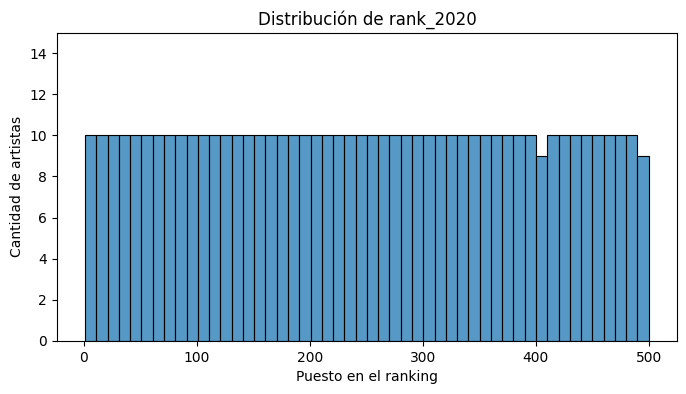

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df_copia['rank_2020'], bins=50, kde=False)
plt.title('Distribuci√≥n de rank_2020')
plt.xlabel('Puesto en el ranking')
plt.ylabel('Cantidad de artistas')
plt.ylim(0, 15)
plt.show()

El histograma complementa la informaci√≥n de la tabla de estad√≠sticas descriptivas al mostrar que la **distribuci√≥n de los artistas** en los puestos del ranking 2020 de Rolling Stone es bastante **uniforme**. Las barras muestran la concentraci√≥n de artistas en intervalos de 10 puestos del ranking, con una **concentraci√≥n** menor en los rangos de los puestos **400-410** y **490-500**.

Esta concentraci√≥n menor se debe a que las filas que componen el ranking 2020 en el dataset son **498**, no 500, debido a la eliminaci√≥n de 2 filas por valores NaN. Eso explica el motivo por el cual entre los rangos mencionados haya **9 artistas**, y no 10.

Cada barra representa un rango de 10 puestos del ranking, lo que indica que, en promedio, hay aproximadamente 10 artistas ubicados dentro de cada intervalo. Esto refuerza la idea de que **no hay una agrupaci√≥n fuerte en ninguna parte del ranking**, lo que refleja una distribuci√≥n relativamente equilibrada de los artistas en los puestos de 1 a 500.

En otras palabras, como estamos trabajando con un ranking, **era de esperar** una distribuci√≥n "uniforme" o "normal" en la que cada puesto entre 1 y 500 est√© ocupado por un √∫nico artista. Esto hace que la distribuci√≥n de posiciones en el ranking sea bastante regular, ya que no es posible que dos artistas ocupen el mismo puesto en el ranking. Por lo tanto, la distribuci√≥n de los artistas en los diferentes rangos de posiciones sigue una l√≥gica que refleja una estructura estandarizada, donde la mayor√≠a de los puestos est√°n ocupados de manera equitativa.

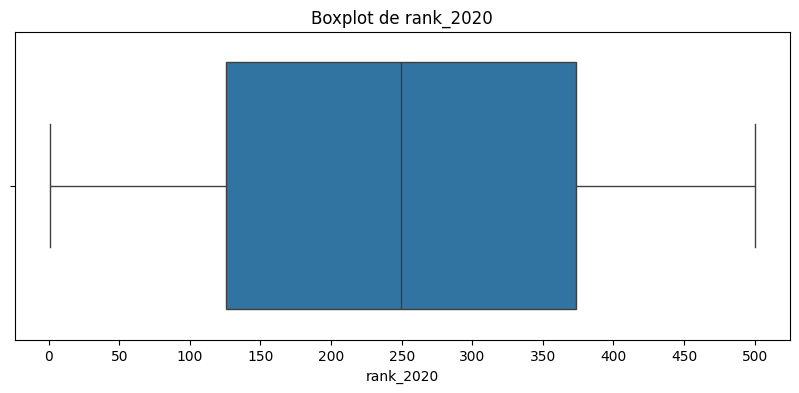

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df_copia['rank_2020'])
plt.title('Boxplot de rank_2020')
plt.xticks(range(0, 501, 50))
plt.show()

El **boxplot** **confirma la distribuci√≥n uniforme de los artistas** en el ranking 2020 de Rolling Stone:

* La **mediana** se encuentra en el puesto 250, indicando que la mitad de los
artistas est√°n por encima y la otra mitad por debajo de esta posici√≥n.
* La **caja**, que abarca desde el puesto 125 hasta el 370, muestra que la mayor√≠a de los artistas se concentran en posiciones intermedias del ranking.
*  Los **bigotes** se extienden hasta los extremos del ranking, dado que los valores ocupan todo el rango de la variable, y no se quedan concentrados cerca de la caja. Esto refuerza la idea de que los datos est√°n distribuidos de manera bastante uniforme a lo largo de todo el ranking, sin concentraciones significativas en ninguna secci√≥n.
* **No se observan outliers**, lo que refuerza la idea de que la distribuci√≥n es bastante homog√©nea a lo largo del ranking.

## 1.3. **Revisi√≥n de estad√≠stica descriptiva de la variable indice_popularidad_spotify**

In [ ]:
df_copia['indice_popularidad_spotify'].describe()

count    653.000000
mean      55.852986
std       14.911183
min       10.000000
25%       46.000000
50%       57.000000
75%       68.000000
max       91.000000
Name: indice_popularidad_spotify, dtype: float64

La tabla de estad√≠sticas descriptivas nos permiten arribar a las siguientes conclusiones preliminares:
1. El valor **m√≠nimo** y **m√°ximo** de los puntajes se ubican entre **10 y 91**, lo que sugiere que, a diferencia de lo determinado en el ranking 2020 de Rolling Stone con la existencia afirmativa de un puesto N¬∞1, no ha habido ning√∫n artista que haya logrado la consagraci√≥n del 100% de la audiencia. Esto podr√≠a estar relacionado a varios factores:
- La **mayor heterogeneidad de la audiencia popular**, en comparaci√≥n con la cr√≠tica especializada, cuyo grupo evaluador puede resultar m√°s homog√©neo en t√©rminos socioecon√≥micos, generacionales y culturales. Esta homogeneidad podr√≠a generar una mayor coincidencia en las evaluaciones, lo que limita la dispersi√≥n de las puntuaciones.
- Las **diferencias en las m√©tricas de medici√≥n**: mientras que en un ranking tradicional siempre existir√° un puesto 1, en plataformas como Spotify **la medici√≥n est√° sujeta al algoritmo**, que depende de factores variables como las preferencias del p√∫blico y la popularidad de las canciones en el momento. Esto genera una mayor dispersi√≥n y dificulta que un artista logre el 100% de popularidad.
- El **algoritmo de Spotify**: el nivel de visibilidad de un artista en Spotify suele estar determinado por factores como el n¬∞ de reproducciones recientes, la cantidad de oyentes √∫nicos, la ubicaci√≥n geogr√°fica de los oyentes, tendencias recientes y preferencias personalizadas. Esta multiplicidad de factores, sumado a que la plataforma segmenta su audiencia de manera diversa, **limita que un √∫nico artista logre una consagraci√≥n absoluta** en toda la base de usuarios.
2. La **media y la mediana est√°n cercanas** (55.85 y 57, respectivamente): esto indica que la distribuci√≥n de los datos es relativamente sim√©trica. Sin embargo, la diferencia entre estos valores refleja la leve inclinaci√≥n de los puntajes hacia la izquierda (sesgo negativo), lo que sugiere que hay **m√°s artistas con puntuaciones m√°s bajas que altas**.
3. El **valor de la desviaci√≥n est√°ndar**: una std de 14.91 revela una dispersi√≥n moderada en torno a la media, lo que implica que **las puntuaciones de los artistas var√≠an considerablemente, pero no de manera extrema**, con la mayor√≠a de los artistas agrupados en torno a la media.
4. El **valor del tercer cuartil** (Q3): el hecho de que el 75% de los artistas se ubiquen entre los puntajes de 10 y 68 indica que la mayor√≠a de los artistas est√°n posicionados en rangos de puntuaci√≥n bajos a moderados, reflejando que **el grueso de los artistas en el ranking no alcanza las posiciones m√°s altas**.

## 1.4. **Visualizaci√≥n de la distribuci√≥n de indice_popularidad_spotify**

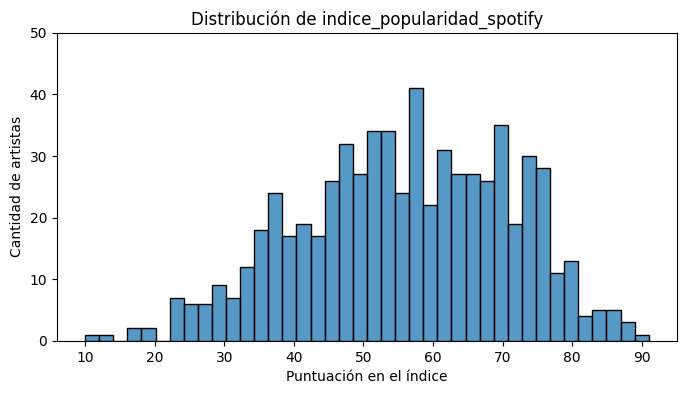

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df_copia['indice_popularidad_spotify'], bins=40, kde=False)
plt.title('Distribuci√≥n de indice_popularidad_spotify')
plt.xlabel('Puntuaci√≥n en el √≠ndice')
plt.ylabel('Cantidad de artistas')
plt.ylim(0, 50)
plt.show()

In [ ]:
moda_indice_popularidad_spotify = df_copia['indice_popularidad_spotify'].mode()
print(f"La moda es: {moda_indice_popularidad_spotify}")

La moda es: 0    58.0
Name: indice_popularidad_spotify, dtype: float64


El **histograma** muestra que la distribuci√≥n de las puntuaciones del √çndice de Popularidad de Spotify **no es uniforme**. Las barras revelan que la mayor concentraci√≥n de artistas se encuentra en el rango de puntuaciones de **40 a 70** puntos, lo que coincide con la ubicaci√≥n de los cuartiles **Q1** y **Q3** seg√∫n las estad√≠sticas descriptivas.

La **moda** del √≠ndice es **58**, lo que significa que este **puntaje es el m√°s frecuente** entre los artistas del ranking 2020 de Rolling Stone. Esto indica que la mayor agrupaci√≥n de artistas se encuentra en torno a este valor, lo que sugiere una distribuci√≥n algo sesgada y no completamente equilibrada.

A diferencia de los rankings tradicionales, el √çndice de Popularidad de Spotify no requiere que cada artista ocupe un √∫nico puesto en la escala (de 0 a 100). Esta caracter√≠stica tambi√©n **contribuye a la dispersi√≥n de los valores** observados en el histograma.

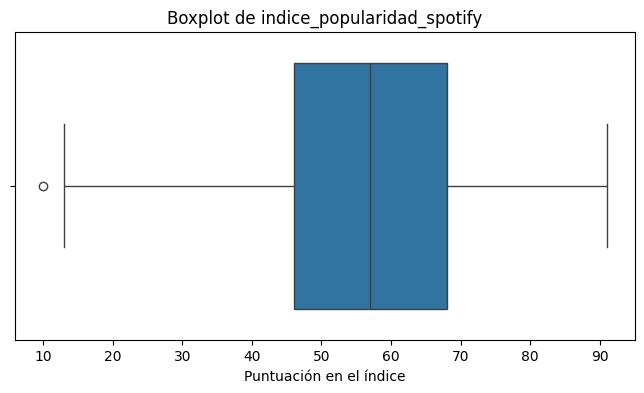

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df_copia['indice_popularidad_spotify'])
plt.title('Boxplot de indice_popularidad_spotify')
plt.xlabel('Puntuaci√≥n en el √≠ndice')
plt.show()

In [ ]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df_copia['indice_popularidad_spotify'].quantile(0.25)
Q3 = df_copia['indice_popularidad_spotify'].quantile(0.75)

# Calcular el rango intercuart√≠lico (IQR)
IQR = Q3 - Q1

# Mostrar el IQR
print(f'Rango intercuart√≠lico (IQR): {IQR}')

Rango intercuart√≠lico (IQR): 22.0


In [ ]:
#Calcular los extremos de los bigotes del boxplot

bigote_izquierdo = Q1 - 1.5 * IQR
bigote_derecho = Q3 + 1.5 * IQR

# Mostrar los resultados
print(f'Extremo izquierdo del bigote: {bigote_izquierdo}')
print(f'Extremo derecho del bigote: {bigote_derecho}')

Extremo izquierdo del bigote: 13.0
Extremo derecho del bigote: 101.0


El **boxplot** nos permite llegar a las siguientes conclusiones:

- **Mayor variabilidad en los primeros valores del √≠ndice**:
el primer 25% de los artistas se ubica entre los puntajes 10 y 46, lo que implica una **mayor dispersi√≥n en los valores bajos del √≠ndice**. Se requieren 36 puntos para cubrir ese rango. Esta variabilidad se refleja visualmente en el boxplot horizontal, donde el bigote izquierdo se extiende m√°s, lo que refuerza la idea de que en los niveles bajos de popularidad hay m√°s distancia entre los artistas.

- **Concentraci√≥n de artistas en el rango medio del √≠ndice**: el siguiente 25% de los datos (de Q1 a la mediana) est√° contenido entre los 46 y 57 puntos, lo cual indica una mayor concentraci√≥n de artistas en ese tramo medio del √≠ndice. A pesar de contener la misma proporci√≥n de artistas, este rango abarca solo 11 puntos, lo que sugiere que muchos comparten niveles similares de popularidad.

- **M√°s de la mitad de los artistas en un rango reducido**: entre Q2 (57) y Q3 (68) tambi√©n hay solo 11 puntos. Esto implica que **el 50% de los artistas est√°n concentrados en un rango de 22 puntos**, como lo demuestra el c√°lculo del rango intercuart√≠lico (IQR).

- **Poca dispersi√≥n entre los artistas m√°s populares**: entre Q3 (68) y el valor m√°ximo (91) se extienden 23 puntos, en los cuales se dispersan los artistas con mayor consagraci√≥n por parte de la audiencia. Esta mayor dispersi√≥n indica que **hay pocos artistas en este tramo m√°s alto**, a diferencia de los que est√°n concentrados en el centro del √≠ndice.

- **Identificaci√≥n de outliers y valores normales**: los extremos de los bigotes se ubican entre los valores 13 y 101, lo que indica que todos los valores dentro de este rango se consideran ‚Äúnormales‚Äù. Por esta raz√≥n, el **√∫nico outlier** queda marcado en el valor **10**, coincidente con el valor m√≠nimo de la tabla seg√∫n las estad√≠sticas descriptivas.

## **1.5. ¬øQu√© tipo de correlaci√≥n hay entre las variables Raking 2020 e √çndice de Popularidad de Spotify?**

In [ ]:
df_copia.isnull().sum()

nombre_artista                       0
album                                0
rank_2020                          188
genero_musical_album                 0
indice_popularidad_spotify          33
genero_artista                       0
edad_promedio_ingreso_ranking        0
a√±os_entre_debut_y_album_top500      0
dtype: int64

## 1.5.1. Filtrado de filas con valores completos

En l√≠nea con las decisiones metodol√≥gicas tomadas durante la etapa de Transform en el proceso ETL sobre el tratamiento de valores faltantes, **se filtrar√°n las filas** que tengan **valores completos** en las columnas relevantes al proceso de an√°lisis comparativos. Este enfoque es especialmente importante para el posterior c√°lculo de la correlaci√≥n de Pearson entre las variables rank_2020 e indice_popularidad_spotify, ya que se requieren filas con valores completos en todas las variables relevantes para obtener un **an√°lisis v√°lido**. Esto se debe a que no es posible cruzar valores num√©ricos de una variable con valores nulos en la otra, ya que este tipo de discrepancia generar√≠a errores en el c√°lculo de la correlaci√≥n. De este modo, se asegura la **fiabilidad** y **precisi√≥n** de los resultados al trabajar √∫nicamente con datos completos.

In [ ]:
# Filtrar filas con NaN en cualquiera de las dos columnas
filas_con_nan = df_copia[df_copia[['rank_2020', 'indice_popularidad_spotify']].isna().any(axis=1)]

# Contar el n√∫mero de filas con NaN
print(f"Filas con NaN en al menos una de las columnas: {len(filas_con_nan)}")

Filas con NaN en al menos una de las columnas: 209


## 1.5.2. C√°lculo de correlaci√≥n de Pearson entre rank_2020 e indice_popularidad_spotify

In [ ]:
# Filtrar las filas que no tienen valores NaN en 'rank_2020' e 'indice_popularidad_spotify'
df_completo = df_copia.dropna(subset=['rank_2020', 'indice_popularidad_spotify'])

# Ahora calcular la correlaci√≥n con los datos filtrados
correlacion = df_completo['rank_2020'].corr(df_completo['indice_popularidad_spotify'])
print(f'La correlaci√≥n de Pearson entre rank_2020 e indice_popularidad_spotify es: {correlacion}')

La correlaci√≥n de Pearson entre rank_2020 e indice_popularidad_spotify es: -0.21523285118066224


El valor obtenido de -0.215 indica una **correlaci√≥n negativa d√©bil** entre el ranking 2020 de Rolling Stone y el √çndice de Popularidad de Spotify. Esto sugiere que, en general, a medida que un artista mejora su posici√≥n en el ranking (es decir, se acerca al puesto 1), su popularidad en Spotify podr√≠a disminuir levemente, aunque la relaci√≥n es muy tenue.

La debilidad del v√≠nculo implica que **no hay un patr√≥n claro ni consistente entre ambas variables**. Aunque existe una leve tendencia opuesta entre cr√≠tica y p√∫blico, el resultado est√° m√°s cerca de 0 que de -1, lo que se√±ala que **la relaci√≥n lineal entre variables es baja**, y **no puede considerarse significativa**.

Insights:
- Las **preferencias de la cr√≠tica y de la audiencia no parecieran estar fuertemente asociadas**, lo que sugiere que responden a criterios distintos de valoraci√≥n con respecto a los artistas.
- Pueden encontrarse **casos dispares**: artistas muy bien posicionados en Rolling Stone y poco populares en Spotify, o lo contrario. Tambi√©n existen combinaciones intermedias, sin un patr√≥n estable, por ejemplo, artistas mal posicionados en Rolling Stone (menos canonizados por la cr√≠tica) y con popularidad moderada en Spotify (m√°s valorados por el p√∫blico).
-** No es posible predecir el comportamiento de una variable a partir de la otra**. La correlaci√≥n observada representa una **tendencia general d√©bil**, no una regla firme, lo que sugiere que intervienen m√∫ltiples factores que afectan el comportamiento de ambas variables. En la **segunda fase del an√°lisis exploratorio (EDA)**, se buscar√° observar si los **indicadores descriptivos** ‚Äîcomo el g√©nero musical del √°lbum, edad, trayectoria o g√©nero del artista‚Äî tienen alg√∫n grado de influencia. Sin embargo, es importante reconocer que tambi√©n pueden incidir **otros tipos posibles de variables** que, aunque quiz√°s relevantes, quedan por fuera del alcance del presente trabajo.

## 1.5.3. Visualizaci√≥n de la correlaci√≥n entre las variables rank_2020 e indice_popularidad_spotify

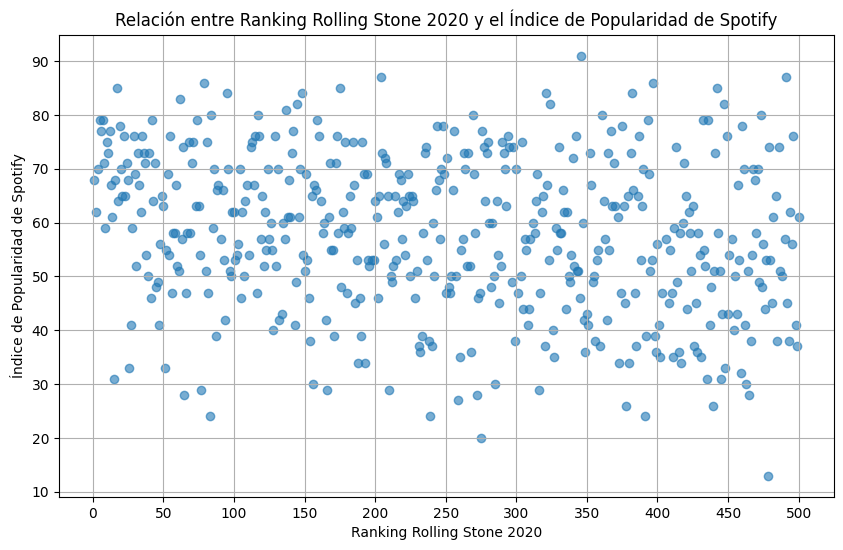

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_completo['rank_2020'], df_completo['indice_popularidad_spotify'], alpha=0.6)

plt.title('Relaci√≥n entre Ranking Rolling Stone 2020 y el √çndice de Popularidad de Spotify')
plt.xlabel('Ranking Rolling Stone 2020')
plt.ylabel('√çndice de Popularidad de Spotify')
plt.grid(True)
plt.xticks(ticks=range(0, 501, 50))
plt.show()

Si bien el an√°lisis detallado de los cruces entre variables se abordar√° en la siguiente fase del EDA, pueden se√±alarse algunas **observaciones iniciales**:

- **La dispersi√≥n es elevada**. Existen artistas altamente valorados tanto por la cr√≠tica como por la audiencia, pero tambi√©n casos en los que solo uno de los dos actores los reconoce, e incluso artistas con bajo reconocimiento en ambos frentes.
- **No se observa una relaci√≥n lineal clara entre ambas variables**, lo que refuerza la idea de que **intervienen m√∫ltiples factores** en la valoraci√≥n de los artistas.


## ‚≠ê **FASE 2 - ¬øQui√©nes son los mejores... y por qu√©? Caracter√≠sticas de los grandes artistas seg√∫n la cr√≠tica y la audiencia**

## 2.1. Top 5 Artistas: Ranking 2020 Rolling Stone vs. √çndice de Popularidad de Spotify

Con el objetivo de asegurar la calidad y la transparencia del an√°lisis, se cre√≥ una **nueva versi√≥n del dataset original** (df_filtrado_eda) que contiene √∫nicamente las **filas con valores completos** en las variables clave del estudio. Esta decisi√≥n responde a principios √©ticos fundamentales del presente trabajo, que indican que, para realizar an√°lisis comparativos, es necesario contar con datos completos en todas las columnas involucradas en el an√°lisis. La **√∫nica excepci√≥n** a esta regla fue la variable **indice_popularidad_spotify**, ya que contiene valores como "Not on Spotify" que, si bien no son num√©ricos, aportan informaci√≥n valiosa sobre la presencia o ausencia de ciertos artistas en esta plataforma, y las implicancias que esto conlleva. Eliminar estos casos implicar√≠a perder informaci√≥n clave para la obtenci√≥n de insights, por lo que se decidi√≥ conservarlos deliberadamente.

In [ ]:
# Crear una copia del dataset df_copia
df_prueba = df_copia.copy()

# Filtrar filas con valores completos en todas las columnas clave, excepto 'indice_popularidad_spotify'
columnas_clave = ['nombre_artista', 'album', 'rank_2020', 'genero_musical_album',
                  'genero_artista', 'edad_promedio_ingreso_ranking', 'a√±os_entre_debut_y_album_top500']

# Crear una versi√≥n filtrada del dataset
df_prueba = df_copia.dropna(subset=columnas_clave)

# Top 5 del Ranking 2020 de Rolling Stone
top5_rank_2020 = df_prueba.nsmallest(5, 'rank_2020')[['nombre_artista', 'album', 'rank_2020', 'indice_popularidad_spotify', 'genero_musical_album', 'genero_artista', 'edad_promedio_ingreso_ranking', 'a√±os_entre_debut_y_album_top500']]

# Top 5 del √çndice de Popularidad de Spotify
top5_indice_popularidad_spotify = df_prueba.nlargest(5, 'indice_popularidad_spotify')[['nombre_artista', 'album', 'indice_popularidad_spotify', 'rank_2020', 'genero_musical_album', 'genero_artista', 'edad_promedio_ingreso_ranking', 'a√±os_entre_debut_y_album_top500']]

# Mostrar resultados
print("Top 5 del Ranking 2020 de Rolling Stone:")
print(top5_rank_2020)

print("\nTop 5 del √çndice de Popularidad de Spotify:")
print(top5_indice_popularidad_spotify)

Top 5 del Ranking 2020 de Rolling Stone:
     nombre_artista                     album  rank_2020  \
226     Marvin Gaye           What's Going On          1   
102  The Beach Boys                Pet Sounds          2   
221   Joni Mitchell                      Blue          3   
370   Stevie Wonder  Songs in the Key of Life          4   
165     The Beatles                Abbey Road          5   

     indice_popularidad_spotify                 genero_musical_album  \
226                        68.0                      Soul/Gospel/R&B   
102                        62.0                          Desconocido   
221                         NaN  Country/Folk/Country Rock/Folk Rock   
370                        70.0                      Soul/Gospel/R&B   
165                        79.0                          Desconocido   

    genero_artista  edad_promedio_ingreso_ranking  \
226           Male                      32.000000   
102           Male                      23.166667   
221   

## 2.2. Estudio de los L√≠deres del Ranking: An√°lisis Comparativo de los Top 5 de Rolling Stone 2020 y el √çndice de Popularidad de Spotify

In [ ]:
# Se unen los Top 5 de ambas variables
top5_completo = pd.concat([top5_rank_2020, top5_indice_popularidad_spotify])

# Se seleccionan los indicadores descriptivos para la caracterizaci√≥n
top5_completo[['nombre_artista', 'album', 'rank_2020', 'indice_popularidad_spotify',
               'genero_musical_album', 'genero_artista', 'edad_promedio_ingreso_ranking',
               'a√±os_entre_debut_y_album_top500']]

nombre_artista                                    album  rank_2020  \
226     Marvin Gaye                          What's Going On          1   
102  The Beach Boys                               Pet Sounds          2   
221   Joni Mitchell                                     Blue          3   
370   Stevie Wonder                 Songs in the Key of Life          4   
165     The Beatles                               Abbey Road          5   
347  Arctic Monkeys                                       AM        346   
245      Kanye West                               Graduation        204   
447    Harry Styles                                Fine Line        491   
69    Billie EIlish  When We All Fall Asleep Where Do We Go?        397   
155     Frank Ocean                                   Blonde         79   

     indice_popularidad_spotify                 genero_musical_album  \
226                        68.0                      Soul/Gospel/R&B   
102                        62.0                          Desconocido   
221                         NaN  Country/Folk/Country Rock/Folk Rock   
370                        70.0                      Soul/Gospel/R&B   
165                        79.0                          Desconocido   
347                        91.0               Indie/Alternative Rock   
245                        87.0                          Hip-Hop/Rap   
447                        87.0               Indie/Alternative Rock   
69                         86.0               Indie/Alternative Rock   
155                        86.0                      Soul/Gospel/R&B   

    genero_artista  edad_promedio_ingreso_ranking  \
226           Male                      32.000000   
102           Male                      23.166667   
221         Female                      28.000000   
370           Male                      26.000000   
165           Male                      27.750000   
347           Male                      27.500000   
245           Male                      30.000000   
447           Male                      25.000000   
69          Female                      18.000000   
155           Male                      29.000000   

     a√±os_entre_debut_y_album_top500  
226                               10  
102                                4  
221                                3  
370                               14  
165                                6  
347                                7  
245                                3  
447                                2  
69                                 0  
155                                4

In [ ]:
# Exportar el dataset top5_completo en un archivo CSV
top5_completo.to_csv('top5_completo.csv', index=False)

In [ ]:
from google.colab import files
files.download('top5_completo.csv')

# Descarga el archivo CSV generado al dispositivo local para para su uso como fuente de datos en la fase de visualizaci√≥n de datos.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **2.2.1. Caracterizaci√≥n del Top 5 de Rolling Stone 2020**

## 2.2.1.1. Puntajes en el √çndice de Popularidad de Spotify: promedio

In [ ]:
media_popularidad_critica = top5_completo.head(5)['indice_popularidad_spotify'].mean()
print(f'La media de las puntuaciones del √çndice de Popularidad en Spotify para el Top 5 de la cr√≠tica es: {media_popularidad_critica:.2f}')

La media de las puntuaciones del √çndice de Popularidad en Spotify del Top 5 de Rolling Stone 2020 es: 69.75


## 2.2.1.2. Posiciones seg√∫n el Ranking 2020 de Rolling Stone: promedio

In [ ]:
media_ranking2020_critica = top5_completo.head(5)['rank_2020'].mean()
print(f'La media de las posiciones obtenidas en el Ranking 2020 de Rolling Stone para el Top 5 de la cr√≠tica es: {media_ranking2020_critica:.2f}')

La media de las posiciones obtenidas en el Ranking 2020 de Rolling Stone para el Top 5 de la cr√≠tica es: 3.00


## 2.2.1.3. G√©nero musical del √°lbum: moda

In [ ]:
moda_genero_album_critica = top5_completo.head(5)['genero_musical_album'].mode()
print(f"El g√©nero musical m√°s reconocido en el Top 5 de la cr√≠tica es: {moda_genero_album_critica}")

El g√©nero musical m√°s reconocido en el Top 5 de la cr√≠tica es: 0        Desconocido
1    Soul/Gospel/R&B
Name: genero_musical_album, dtype: object


## 2.2.1.4. G√©nero del artista: moda

In [ ]:
moda_genero_artista_critica = top5_completo.head(5)['genero_artista'].mode()
print(f"El g√©nero del artista m√°s predominante en el Top 5 de la cr√≠tica es: {moda_genero_artista_critica}")

El g√©nero del artista m√°s predominante en el Top 5 de la cr√≠tica es: 0    Male
Name: genero_artista, dtype: object


## 2.2.1.5. Edad promedio de ingreso al ranking Rolling Stone: promedio

In [ ]:
media_edad_ingreso_critica = top5_completo.head(5)['edad_promedio_ingreso_ranking'].mean()
print(f'La media de la edad promedio de ingreso al ranking Rolling Stone para el Top 5 de la cr√≠tica es: {media_edad_ingreso_critica:.2f}')

La media de la edad promedio de ingreso al ranking Rolling Stone para el Top 5 de Rolling Stone 2020 es: 27.38


## 2.2.1.6. A√±os transcurridos entre el debut y el ingreso al Top 500 de Rolling Stone: promedio

In [ ]:
media_a√±os_transcurridos_critica = top5_completo.head(5)['a√±os_entre_debut_y_album_top500'].mean()
print(f'La media de los a√±os transcurridos entre el debut y el ingreso al Top 500 de Rolling Stone para el Top 5 de la cr√≠tica es: {media_a√±os_transcurridos_critica:.2f}')

La media de los a√±os transcurridos entre el debut y el ingreso al Top 500 de Rolling Stone para el Top 5 de Rolling Stone 2020 es: 7.40


## **2.2.2. Caracterizaci√≥n del Top 5 seg√∫n el √çndice de Popularidad de Spotify**

## 2.2.2.1. Posiciones seg√∫n el Ranking 2020 de Rolling Stone: promedio

In [ ]:
media_ranking2020_audiencia = top5_completo.tail(5)['rank_2020'].mean()
print(f'La media de las posiciones obtenidas en el Ranking 2020 de Rolling Stone para el Top 5 de la audiencia popular es: {media_ranking2020_audiencia:.2f}')

La media de las posiciones obtenidas en el Ranking 2020 de Rolling Stone para el Top 5 de la audiencia popular seg√∫n el √çndice de Popularidad de Spotify es: 303.40


In [ ]:
mediana_ranking2020_audiencia = top5_completo.tail(5)['rank_2020'].median()
print(f'La mediana de las posiciones obtenidas en el Ranking 2020 de Rolling Stone para el Top 5 de la audiencia popular es: {mediana_ranking2020_audiencia:.2f}')

La mediana de las posiciones obtenidas en el Ranking 2020 de Rolling Stone para el Top 5 de la audiencia popular seg√∫n el √çndice de Popularidad de Spotify es: 346.00


## 2.2.2.2. Puntajes en el √çndice de Popularidad de Spotify: promedio

In [ ]:
media_popularidad_audiencia = top5_completo.tail(5)['indice_popularidad_spotify'].mean()
print(f'La media de las puntuaciones del √çndice de Popularidad en Spotify para el Top 5 de la audiencia popular es: {media_popularidad_audiencia:.2f}')

La media de las puntuaciones del √çndice de Popularidad en Spotify para el Top 5 de la audiencia es: 87.40


## 2.2.2.3. G√©nero musical del √°lbum: moda

In [ ]:
moda_genero_album_audiencia = top5_completo.tail(5)['genero_musical_album'].mode()
print(f"El g√©nero musical m√°s reconocido en el Top 5 de la audiencia popular es: {moda_genero_album_audiencia}")

El g√©nero musical m√°s reconocido en el Top 5 de la audiencia es: 0    Indie/Alternative Rock
Name: genero_musical_album, dtype: object


## 2.2.2.4. G√©nero del artista: moda

In [ ]:
moda_genero_artista_audiencia = top5_completo.tail(5)['genero_artista'].mode()
print(f"El g√©nero del artista m√°s predominante en el Top 5 de la audiencia popular es: {moda_genero_artista_audiencia}")

El g√©nero del artista m√°s predominante en el Top 5 de la audiencia es: 0    Male
Name: genero_artista, dtype: object


## 2.2.2.5. Edad promedio de ingreso al ranking Rolling Stone: promedio

In [ ]:
media_edad_ingreso_audiencia = top5_completo.tail(5)['edad_promedio_ingreso_ranking'].mean()
print(f'La media de la edad promedio de ingreso al ranking Rolling Stone para el Top 5 de la audiencia popular es: {media_edad_ingreso_audiencia:.2f}')

La media de la edad promedio de ingreso al ranking Rolling Stone para el Top 5 de la audiencia es: 25.90


## 2.2.2.6. A√±os transcurridos entre el debut y el ingreso al Top 500 de Rolling Stone: promedio

In [ ]:
media_a√±os_transcurridos_audiencia = top5_completo.tail(5)['a√±os_entre_debut_y_album_top500'].mean()
print(f'La media de los a√±os transcurridos entre el debut y el ingreso al Top 500 de Rolling Stone para el Top 5 de la audiencia popular es: {media_a√±os_transcurridos_audiencia:.2f}')

La media de los a√±os transcurridos entre el debut y el ingreso al Top 500 de Rolling Stone para el Top 5 de la audiencia es: 3.20
